<a href="https://colab.research.google.com/github/Firmnsyaah/Batik-Nusantara/blob/main/Backup_61_Klasifikasi_Batik_Nusantara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_DIR = '/content/drive/MyDrive/SKRIPSI Bismillah Lancar BACKUP/Batik Nusantara'
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32

In [ ]:
# Data augmentation untuk dataset pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator untuk dataset pengujian (hanya rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator untuk data pelatihan
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Train'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Membuat generator untuk data pengujian
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Test'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1056 images belonging to 21 classes.
Found 273 images belonging to 21 classes.


In [ ]:
# Load the pre-trained MobileNetV2 model with ImageNet weights
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Add custom layers on top of the base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10  # Sesuaikan dengan kebutuhan
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 505s 13s/step - accuracy: 0.1091 - loss: 3.2875 - val_accuracy: 0.3333 - val_loss: 2.4894
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.2877 - loss: 2.4583 - val_accuracy: 0.4762 - val_loss: 2.0452
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.3653 - loss: 2.1779 - val_accuracy: 0.4762 - val_loss: 1.8343
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.4055 - loss: 1.9320 - val_accuracy: 0.5275 - val_loss: 1.6735
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5022 - loss: 1.6354 - val_accuracy: 0.5421 - val_loss: 1.5788
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.5351 - loss: 1.5538 - val_accuracy: 0.5495 - val_loss: 1.5313
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5224 - loss: 1.5322 - val_accuracy: 0.5714 - val_loss: 1.4682
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5448 - loss: 1.4196 - val_accuracy: 0.5934 - val_loss: 1.4246

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Inisialisasi Early Stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Lanjutkan pelatihan model dengan Early Stopping dan epoch maksimum
history = model.fit(
    train_generator,
    epochs=20,  # Epoch maksimum, bisa dinaikkan
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 571s 14s/step - accuracy: 0.1189 - loss: 3.1346 - val_accuracy: 0.3040 - val_loss: 2.4124
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.2821 - loss: 2.4189 - val_accuracy: 0.4359 - val_loss: 1.9969
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.3780 - loss: 2.1203 - val_accuracy: 0.4725 - val_loss: 1.8066
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.4912 - loss: 1.7803 - val_accuracy: 0.4872 - val_loss: 1.6907
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5044 - loss: 1.6660 - val_accuracy: 0.4945 - val_loss: 1.6055
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5262 - loss: 1.5777 - val_accuracy: 0.5275 - val_loss: 1.5655
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.5519 - loss: 1.4470 - val_accuracy: 0.5385 - val_loss: 1.4990
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.5965 - loss: 1.3320 - val_accuracy: 0.5604 - val_loss: 1.4

9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


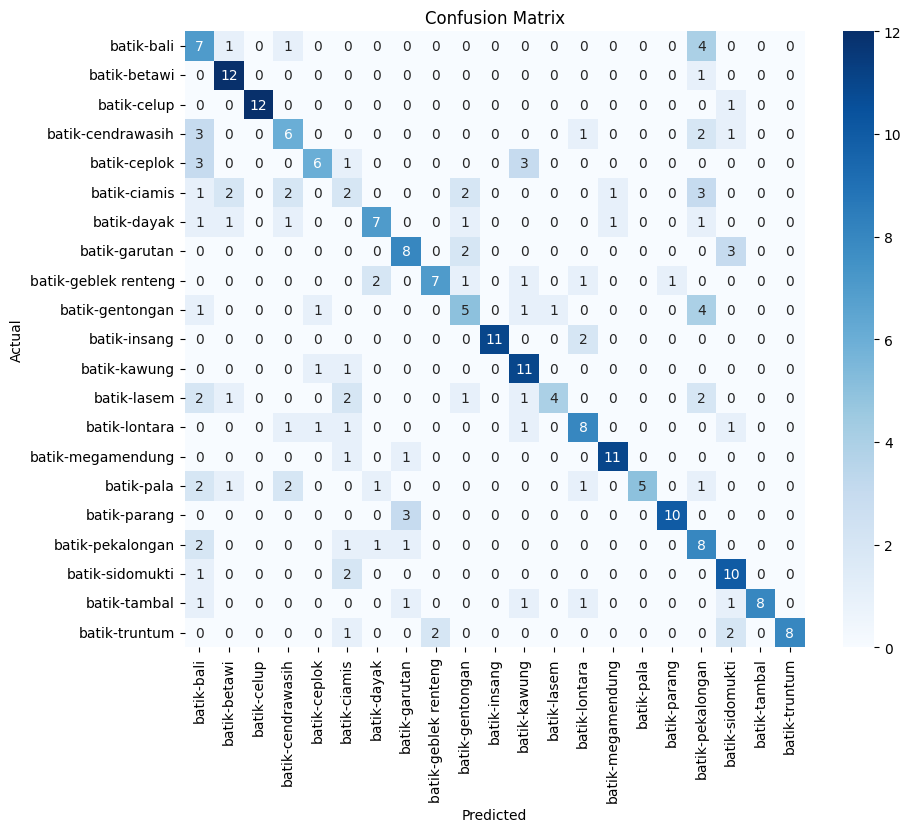

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil prediksi dari data pengujian
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Membuat Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Ada beberapa kesalahan kelas yang salah dalam klasifikasi contohnya:
**batik lasem dan batik bali** mungkin karena motif visual motif tsb memiliki kemiripan
**Batik-ceplok, batik-ciamis dan batik-pala** juga menunjukkan beberapa prediksi yang salah ke kelas lain


In [ ]:
# Buka layer terakhir dari base_model untuk fine-tuning
base_model.trainable = True  # Membuka semua layer terlebih dahulu
for layer in base_model.layers[:-50]:  # Membekukan sebagian besar layer awal
    layer.trainable = False  # Membekukan semua kecuali 50 layer terakhir

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),  # Learning rate lebih rendah untuk fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Train'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Test'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1056 images belonging to 21 classes.
Found 273 images belonging to 21 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=20,  # Tentukan epoch maksimum
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.2998 - loss: 2.6777 - val_accuracy: 0.6447 - val_loss: 1.2441
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.3672 - loss: 2.3960 - val_accuracy: 0.6374 - val_loss: 1.2292
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.4046 - loss: 2.1153 - val_accuracy: 0.6374 - val_loss: 1.2227
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.4395 - loss: 1.8915 - val_accuracy: 0.6337 - val_loss: 1.2279


In [ ]:
# Mengambil prediksi dari data pengujian
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Membuat Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'model' is not defined

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {test_accuracy:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6154 - loss: 1.3384
Final Test Accuracy: 0.61
